In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from Binance import BinanceClient as client
import Stats as sts
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
bc = client.instance()
eosusdt = bc.get_kline_pd('EOSUSDT')
eosusdt = eosusdt.set_index(['CloseTime'])
btcusdt = bc.get_kline_pd('BTCUSDT')
btcusdt = btcusdt.set_index(['CloseTime'])
bnbusdt = bc.get_kline_pd('BNBUSDT')
bnbusdt = bnbusdt.set_index(['CloseTime'])

crypto = pd.DataFrame(
    {
        'EOS': eosusdt['Close'],
        'BNB': bnbusdt['Close'],
        'BTC': btcusdt['Close'],
    },
    index=eosusdt.index
)
crypto.tail()

,EOS,BNB,BTC
CloseTime,,,
2021-04-13 16:14:59.999000064+08:00,6.7273,558.1299,61555.79
2021-04-13 16:15:59.999000064+08:00,6.7367,559.9371,61966.14
2021-04-13 16:16:59.999000064+08:00,6.7271,560.4472,62187.88
2021-04-13 16:17:59.999000064+08:00,6.6914,559.4740,62350.74
2021-04-13 16:18:59.999000064+08:00,6.6849,557.4571,62199.15


In [ ]:
# crypto = pd.concat([eosusdt.index, eosusdt['Close'], btcusdt['Close']],
#                     axis=1)


In [ ]:
pd.concat([crypto.mean(), crypto.median(), crypto.mean()>crypto.median()], axis='columns')

In [ ]:
sts.skewness(crypto)

In [ ]:
norm.skew(crypto)

In [ ]:
sts.kurtosis(crypto)

In [ ]:
norm.kurtosis(crypto)

In [ ]:
norm.jarque_bera(crypto)

In [3]:
sts.is_normal(crypto['EOS'])

False

In [ ]:
sts.semideviation(crypto)

In [ ]:
crypto.std(ddof=0)

In [ ]:
crypto['EOS'][crypto['EOS']>0].std(ddof=0)

In [ ]:
sts.var_historic(crypto)

In [ ]:
crypto['BTC'].plot()

In [ ]:
np.percentile(crypto, 5, axis=0)

In [5]:
import scipy.stats
scipy.stats.norm.ppf(0.05)

-1.6448536269514729

In [11]:
sts.var_historic(crypto)

EOS       -6.420265
BNB     -549.984475
BTC   -59826.436500
dtype: float64

In [10]:
sts.var_gaussian(crypto)

EOS       -6.388452
BNB     -553.687683
BTC   -59624.183404
dtype: float64

In [9]:
sts.var_gaussian(crypto,True)

EOS       -6.344806
BNB     -542.509687
BTC   -59340.920641
dtype: float64

<AxesSubplot:>

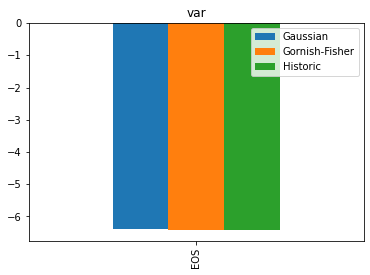

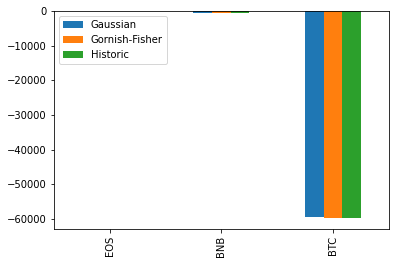

In [24]:
var_list = [sts.var_gaussian(crypto),
            sts.var_gaussian(crypto, modified=True),
            sts.var_historic(crypto)]
comparison = pd.concat(var_list, axis=1)
comparison.columns = ['Gaussian', 'Gornish-Fisher', 'Historic']
comparison.loc[['EOS']].plot.bar(title='var')
comparison.plot.bar()

<AxesSubplot:xlabel='CloseTime'>

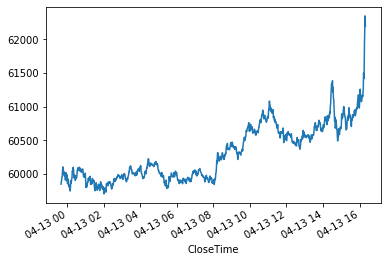

In [12]:
crypto['BTC'].plot()

In [25]:
sts.cvar_historic(crypto)

EOS       -6.420265
BNB     -549.984475
BTC   -59826.436500
dtype: float64